# Modules 2

## Matplotlib

Some things in these exercises have not been fully explained in class. You have to do your own research in order to successfully complete some of them.

In [4]:
import matplotlib.pyplot as plt

### Basic Line Plot

Plot the numbers 1, 2, 3, 4, 5 on the Y-axis against the numbers 2, 3, 4, 5, 6 on the X-axis.

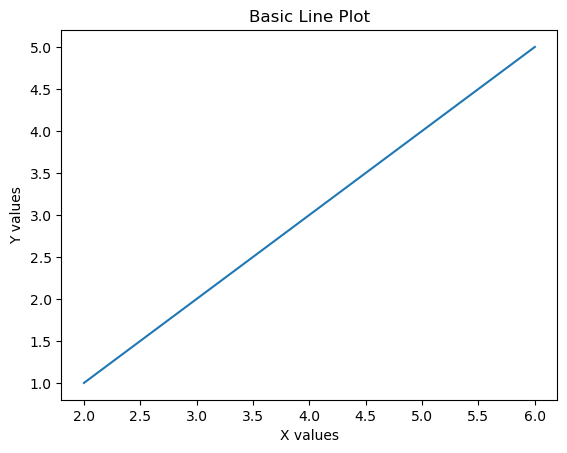

In [5]:
y = [1, 2, 3, 4, 5]
x = [2, 3, 4, 5, 6]

plt.plot(x, y)

plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Basic Line Plot")
plt.show()

### Multiple Line Plots in One Graph

Plot two lines in the same graph:
- X-axis values: 1, 2, 3, 4, 5
- First Y-axis values: $(x^3)$
- Second Y-axis values: $(x^3 + 5x^2 + x)$

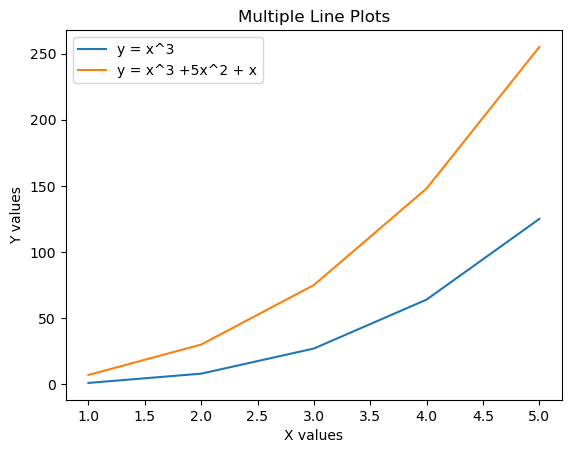

In [6]:
x = [1, 2, 3, 4, 5]
y1 = [val ** 3 for val in x]
y2 = [val ** 3 + 5 * val ** 2 + val for val in x]

plt.plot(x, y1, label ="y = x^3")
plt.plot(x, y2, label = "y = x^3 +5x^2 + x")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Multiple Line Plots")

plt.legend()
plt.show()

### Combined Line and Bar Chart

Use the following data:
- Months: January, February, March, April
- Sales (for line plot): 100, 120, 140, 160
- Costs (for bar chart): 80, 85, 88, 90

Plot Sales data as a line plot and Costs data as a bar chart on the same graph.

**Hint**: You might want to use `twinx()` for dual Y axes.

<function matplotlib.pyplot.show(close=None, block=None)>

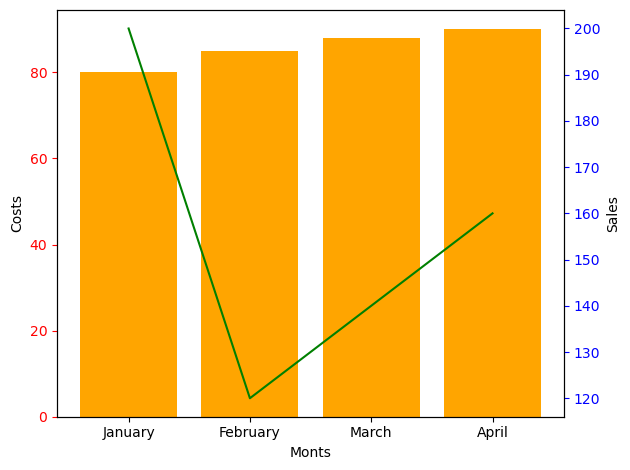

In [7]:
months = ["January", "February", "March", "April"]
sales = [200, 120, 140, 160]
costs = [80, 85, 88, 90]

fig, gra1 = plt.subplots()

gra2 = gra1.twinx()

gra1.bar(months, costs, color = "orange")
gra1.set_xlabel("Monts")
gra1.set_ylabel("Costs")
gra1.tick_params("y", colors = "r")

gra2.plot(months, sales, color = "green")
gra2.set_xlabel("Monts")
gra2.set_ylabel("Sales")
gra2.tick_params("y", colors = "b")  #Cambia el color de los numeros

fig.tight_layout()
plt.show





### Subplots with Different Charts

Using the data:
- X-values: 1, 2, 3, 4, 5
- Y-values: 2, 3, 5, 7, 11

Create a 2x2 grid of plots:
- A line chart.
- A scatter plot.
- A bar chart.
- A histogram of Y-values.

**Hint**: Check `plt.subplots()` and how to plot with the axis returned by subplots.

<function matplotlib.pyplot.show(close=None, block=None)>

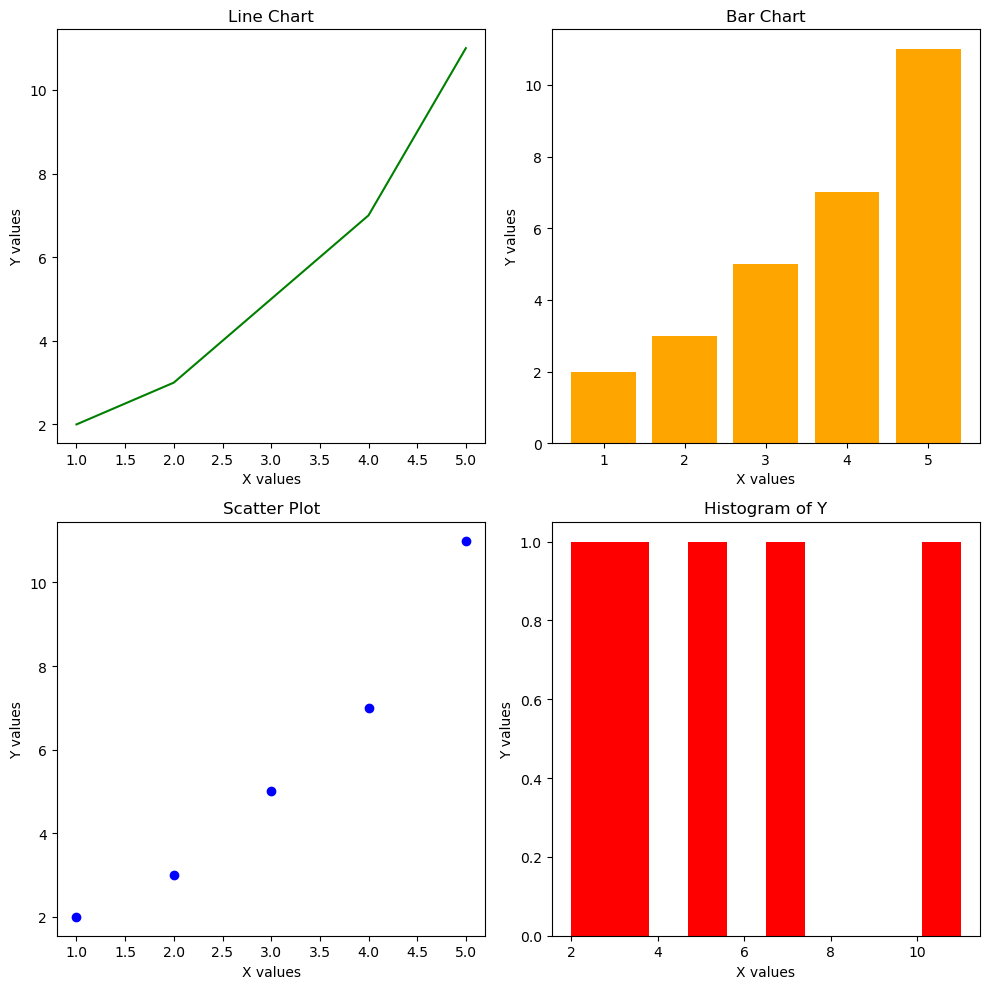

In [8]:
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

fig, gra = plt.subplots(2, 2, figsize=(10, 10))

gra[0,0].plot(x, y, color = "green")
gra[0,0].set_xlabel("X values")
gra[0,0].set_ylabel("Y values")
gra[0,0].set_title("Line Chart")

gra[0,1].bar(x, y, color = "orange")
gra[0,1].set_xlabel("X values")
gra[0,1].set_ylabel("Y values")
gra[0,1].set_title("Bar Chart")

gra[1,0].scatter(x, y, color = "blue")
gra[1,0].set_xlabel("X values")
gra[1,0].set_ylabel("Y values")
gra[1,0].set_title("Scatter Plot")

gra[1,1].hist(y, color = "red")
gra[1,1].set_xlabel("X values")
gra[1,1].set_ylabel("Y values")
gra[1,1].set_title("Histogram of Y")

fig.tight_layout()
plt.show

### Customized Scatter Plot

For the data:
- X-values: 1, 2, 3, 4, 5
- Y-values: 5, 4, 8, 6, 9
- Size: 100, 200, 300, 400, 500
- Color: red, blue, green, yellow, pink

Create a scatter plot where each point has a unique size and color.

Add a legend describing each point.

**Hint**: You can create one scatter plot for each X and overlap all of them in the same chart.

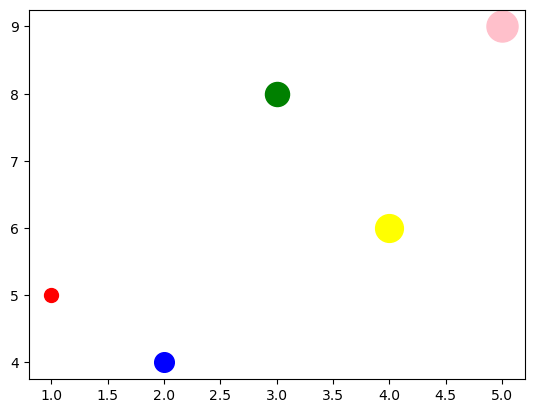

In [9]:
x = [1, 2, 3, 4, 5]
y = [5, 4, 8, 6, 9]
size = [100, 200, 300, 400, 500]
color = ["red", "blue", "green", "yellow", "pink"]

for i in range(len(x)):
    plt.scatter(x[i],y[i], s = size[i], c = color[i])

plt.show()

### Stacked Bar Chart

Given:
- Categories: A, B, C
- Value set 1: 3, 4, 5
- Value set 2: 1, 2, 1

Create a stacked bar chart representing the data.

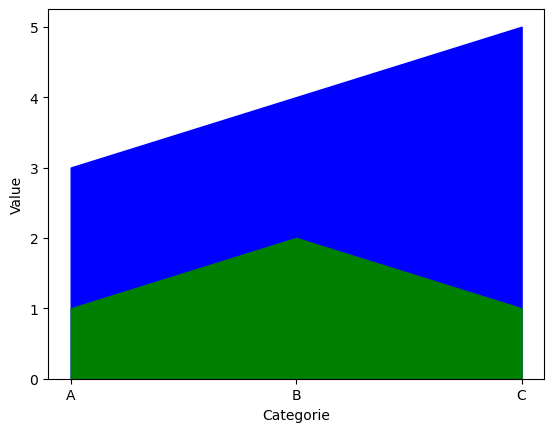

In [10]:
cat = ["A", "B", "C"]
val1 = [3, 4, 5]
val2 = [1, 2, 1]

plt.stackplot(cat, val1, color = "blue")
plt.stackplot(cat, val2, color = "green")
plt.xlabel("Categorie")
plt.ylabel("Value")

plt.show()



## Pandas

In [41]:
import pandas as pd

### Employees

Use `datasets/Employees.csv` for the following exercises.

In [42]:
data = pd.read_csv("./Employees.csv")

#### Average age

Calculate the average age of the employees.

In [43]:
df = pd.DataFrame(data)
print(df["Age"].mean())

30.142857142857142


#### Total salary

Calculate the sum of all the salaries the company has to pay each year.

In [44]:
print(df["Salary"].sum())

489000


#### Department-wise Average Age

Calculate the average age of employees in each department.

In [45]:
print(df["Department"])
df_HR = df["Department"] == "HR"
df_IT = df["Department"] == "IT"
df_Fi = df["Department"] == "Finance"
df_Sa = df["Department"] == "Sales"
df_HR = df[df_HR]
df_IT = df[df_IT]
df_Fi = df[df_Fi]
df_Sa = df[df_Sa]

print(df_HR["Age"].mean())
print(df_IT["Age"].mean())
print(df_Fi["Age"].mean())
print(df_Sa["Age"].mean())

# Mejor hacerlo asi mas rapido ^^
print(df.groupby("Department")["Age"].mean())


0         HR
1         IT
2    Finance
3         HR
4         IT
5      Sales
6    Finance
Name: Department, dtype: object
31.5
36.0
23.5
29.0
Department
Finance    23.5
HR         31.5
IT         36.0
Sales      29.0
Name: Age, dtype: float64


#### Filter and Sort

Filter out employees who joined after January 1, 2020, and sort them by their salary in descending order.

In [46]:

df2 = df[df["JoiningDate"] > "2020-01-01"]
print(df2.sort_values("Salary", ascending=False))

      Name  Age Department  Salary JoiningDate
2  Charlie   25    Finance   75000  2021-03-25
6    Grace   22    Finance   72000  2022-04-10
0    Alice   28         HR   60000  2020-01-15
5    Frank   29      Sales   55000  2022-01-01


#### Employees' Tenure

Add a column Tenure to the dataframe which represents how many years an employee has worked until today.

In [47]:
df["JoiningDate"] = pd.to_datetime(df["JoiningDate"])
df["Tenure"] = df["JoiningDate"].apply(lambda x: 2023 -  x.year)
print(df)

      Name  Age Department  Salary JoiningDate  Tenure
0    Alice   28         HR   60000  2020-01-15       3
1      Bob   32         IT   80000  2019-11-20       4
2  Charlie   25    Finance   75000  2021-03-25       2
3    David   35         HR   62000  2018-06-07       5
4      Eve   40         IT   85000  2017-08-19       6
5    Frank   29      Sales   55000  2022-01-01       1
6    Grace   22    Finance   72000  2022-04-10       1


#### Department Salary Budget
Calculate the total salary budget for each department.

In [48]:
#df.loc[df["Name"] == "Alice", "Salary"] = 60000     #Por si acaso 
#df.loc[df["Name"] == "Bob", "Salary"] = 80000
#df.loc[df["Name"] == "Charlie", "Salary"] = 75000
#df.loc[df["Name"] == "David", "Salary"] = 62000
#df.loc[df["Name"] == "Eve", "Salary"] = 85000
#df.loc[df["Name"] == "Frank", "Salary"] = 55000
#df.loc[df["Name"] == "Grace", "Salary"] = 72000
print(df.groupby("Department")["Salary"].sum())

Department
Finance    147000
HR         122000
IT         165000
Sales       55000
Name: Salary, dtype: int64


#### Rename and Transform
Rename the column 'JoiningDate' to 'StartDate' and convert the 'Salary' column from yearly to monthly (divided by 12).

In [49]:
df.rename(columns={"JoiningDate": "StartDate"}, inplace = True)
df["Salary"] = df["Salary"].apply(lambda x: x / 12).round(2)
print(df)

      Name  Age Department   Salary  StartDate  Tenure
0    Alice   28         HR  5000.00 2020-01-15       3
1      Bob   32         IT  6666.67 2019-11-20       4
2  Charlie   25    Finance  6250.00 2021-03-25       2
3    David   35         HR  5166.67 2018-06-07       5
4      Eve   40         IT  7083.33 2017-08-19       6
5    Frank   29      Sales  4583.33 2022-01-01       1
6    Grace   22    Finance  6000.00 2022-04-10       1


#### Oldest Employee in Each Department

Find the name and age of the oldest employee in each department.

In [51]:
df.groupby("Department")["Name","Age"].max()

C:\Users\Alumne_mati1\AppData\Local\Temp\ipykernel_8792\3722171185.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("Department")["Name","Age"].max()


,Name,Age
Department,,
Finance,Grace,25
HR,David,35
IT,Eve,40
Sales,Frank,29


#### Count Employees in Each Department
Find out how many employees work in each department.



In [55]:
df.groupby("Department")["Department"].count()

Department
Finance    2
HR         2
IT         2
Sales      1
Name: Department, dtype: int64

#### Salary Distribution

Plot a histogram of employee salaries to observe the distribution of monthly salaries in the company.

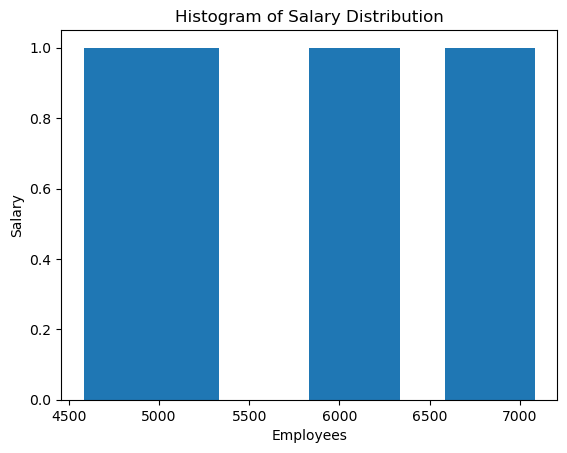

In [62]:
#x = list(df["Name"])
y = list(df["Salary"])

plt.hist(y)
plt.xlabel("Employees")
plt.ylabel("Salary")
plt.title("Histogram of Salary Distribution")

plt.show()

#### Tenure Distribution

Create a bar chart that shows the number of employees that fall into each of the following tenure groups: 0-1 year, 1-3 years, 3-5 years, 5+ years.

**Hint**: Check `pd.cut()` for partitioning the data.

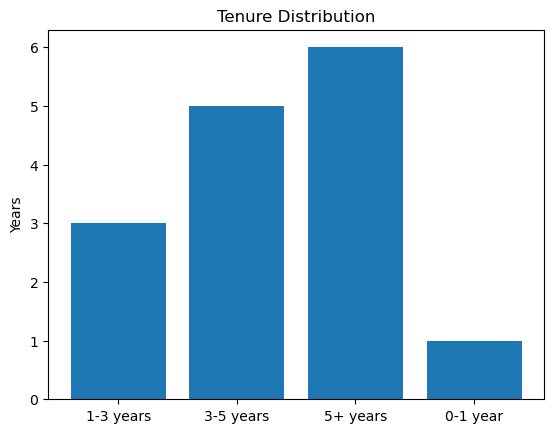

In [68]:
x = list(df["Tenure"])
y = list(pd.cut(df["Tenure"], bins = [0, 1, 3, 5, 100], labels = ["0-1 year", "1-3 years", "3-5 years", "5+ years"]))

plt.bar(y,x)
plt.title("Tenure Distribution")
plt.ylabel("Years")

plt.show()

#### Employee Salary vs. Years at Company

Use a scatter plot to visualize the relationship between an employee's salary and their tenure at the company.

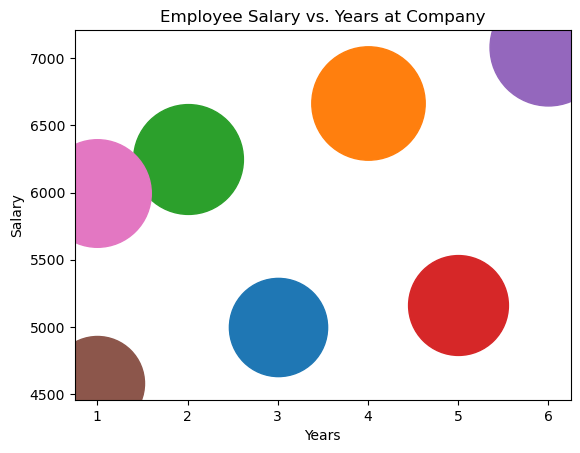

In [72]:
x = list(df["Tenure"])
y = list(df["Salary"])

for i in range(len(x)):
    plt.scatter(x[i],y[i], s = y[i])

plt.xlabel("Years")
plt.ylabel("Salary")
plt.title("Employee Salary vs. Years at Company")

plt.show()

### Transactions

Use `datasets/Transactions.csv` for the following exercises.

#### Monthly Sales
Calculate the total sales for each month. Sales for a transaction are calculated as `Quantity * Price`.

#### Top Products by Sales
List the top 3 products by total sales.

#### Customer Lifetime Value
Calculate the lifetime value of each customer, which is the sum of all their sales.

#### Customer Segmentation
Segment customers into three categories:
- High Value: Lifetime value greater than 1,300€
- Medium Value: Lifetime value between 800€ and 1,300€
- Low Value: Lifetime value less than 800€

#### Repeat Customers
Identify customers who have made more than two purchases.

#### Products Not Purchased
List all products that were not purchased by a specific customer, say CustomerID `1001`.

#### Transactions Over Time

Plot a line chart showing the number of sales that occurred on each date (sorted ascendingly).

#### Product Popularity

Use a bar chart to display the total quantity sold for each product.

### Bank Marketing

Use `datasets/bank-full.csv` for the following exercises.

The Bank Marketing Dataset contains data related to direct marketing campaigns (via phone calls) of a real Portuguese banking institution.

#### Data Overview

- Load the dataset and view the first 5 rows.
- Determine the total number of rows and columns in the dataset.
- Check for any missing values.

#### Campaign Analysis

Calculate the success rate of the campaign, i.e., the proportion of clients who subscribed to a term deposit. Clients who subscribed are the ones marked as 'yes' on the `y` column.

#### Jobs & Subscriptions

- Identify the job category with the highest number of subscriptions for the term deposit.
- Plot a bar chart showing the number of subscriptions per job category.

#### Age Analysis

Segment the clients into age groups by creating a new column `age_group`:
- Young (age < 30)
- Middle-aged (30 ≤ age < 50)
- Senior (age ≥ 50)

Then calculate the subscription rate for each age group.

#### Subscription vs. Loan

Analyze the impact of having a personal loan (`loan` column is `"yes"`) on subscribing to a term deposit. Is having a loan significantly affecting the subscription rate?

#### Duration Analysis

Understand the effect of contact duration (`duration`) on the subscription outcome. Do longer calls correlate with higher subscription rates?

#### Month-wise Analysis

- Determine which month had the highest number of contacts.
- Which month had the highest subscription rate?

#### Education & Subscriptions

- Group clients based on their education level and determine the subscription rates for each group.
- Plot the subscription rates against education levels. Which group is most likely to subscribe to a term deposit?

#### Housing Loans & Subscriptions

Determine the proportion of clients with a housing loan.

#### Effect of Marital Status

- Plot the distribution of the clients based on marital status.
- Calculate the subscription rate for each marital status group.

#### Balance Analysis

Segment the clients into balance groups (create a new column `balance_broup`:
- Negative Balance
- Low (0 to 1000)
- Medium (1000 to 5000)
- High (>5000)

Determine the group that has the highest number of term deposit subscriptions.

#### Pivot Analysis

Create a pivot table with `job` as the rows, `marital` status as the columns, and the values being the average of the `balance`.

**Hing**: Pandas provides a `pivot_table` function that can be used for this purpose.

#### Time Series Analysis

- Convert the day and month columns into a proper datetime format (the whole dataset was collected in 2011).
- Plot the trend of the number of contacts made by the bank across time (daily frequency).

#### Composite Feature Creation

Combine `housing` and `loan` to create a composite feature named `financial_status` with the following categories:
- Both: If a client has both a housing loan and a personal loan.
- Housing: If a client only has a housing loan.
- Personal: If a client only has a personal loan.
- None: If a client has neither.

Investigate how the `financial_status` affects the term deposit subscription rates.